In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn

torch.manual_seed(5)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Logistic Regression


## make Data

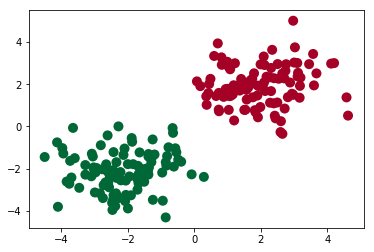

Variable containing:
 2.8789  2.0776  0.0000
 2.8123  1.3840  0.0000
 1.5641  1.7308  0.0000
 2.6480 -0.3500  0.0000
 2.9753  1.4950  0.0000
 0.8800  1.3989  0.0000
 1.1455  1.7187  0.0000
 2.9366  1.5472  0.0000
 1.5337  0.7897  0.0000
 2.4416  0.3842  0.0000
 1.6785  1.9870  0.0000
 3.5972  1.9422  0.0000
 0.6528  1.4413  0.0000
 2.2650  2.3245  0.0000
 3.1907  2.3121  0.0000
 2.0514  1.9208  0.0000
 3.4511  2.9486  0.0000
 1.1009  1.4544  0.0000
 0.4447  2.0096  0.0000
 2.3899  1.0925  0.0000
 0.8140  3.2693  0.0000
 3.0245  3.7432  0.0000
 2.1699  2.3529  0.0000
 3.5715  3.4296  0.0000
 1.1992  1.9024  0.0000
 3.1185  2.5364  0.0000
 1.6845  2.1719  0.0000
 2.1106  2.9067  0.0000
 2.7589  2.9441  0.0000
 1.8400  0.6735  0.0000
 2.2761  1.1227  0.0000
 1.9114  0.4322  0.0000
 0.8244  2.9157  0.0000
 0.4831  2.2513  0.0000
 1.8941  1.4634  0.0000
 1.0336  0.7840  0.0000
 0.9415  1.7678  0.0000
 2.0858  3.3096  0.0000
 1.9919  2.9363  0.0000
 0.7363  1.5871  0.0000
 2.0195  1.9209  0.

In [9]:
n_data = torch.ones(100,2)
x0 = torch.normal(2*n_data,1)
#평균과 표준 편차가 주어진 별도의 정규 분포에서 추출한 난수의 텐서 (Tensor)를 반환합니다.
y0 = torch.zeros(100,1)
x1 = torch.normal(-2*n_data,1)
y1 = torch.ones(100,1)

x = torch.cat((x0, x1), 0).type(torch.FloatTensor)
y = torch.cat((y0, y1), 0).type(torch.FloatTensor)
# 0     1
# 1     1 2
# 2
x,y =  Variable(x), Variable(y)

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

torch.cat( (x, y), 1)

## Define Logistic Model

In [10]:
linear = nn.Linear(2, 1, bias = True)

sigmoid = nn.Sigmoid()

model = nn.Sequential(linear, sigmoid)

In [11]:
model.state_dict()

OrderedDict([('0.weight', 
              -0.1371  0.1178
              [torch.FloatTensor of size 1x2]), ('0.bias', 
               0.2986
              [torch.FloatTensor of size 1])])

In [12]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

cost_fn = nn.BCELoss()
#cost_fn = -(y * torch.log(prob) + (1 - y)* torch.log(1 - prob) ).mean() 


## Train

In [13]:
x.size()

torch.Size([200, 2])

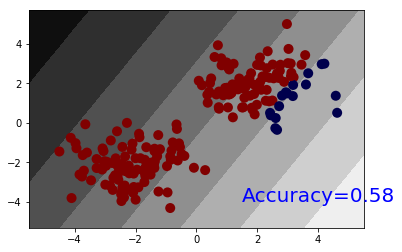

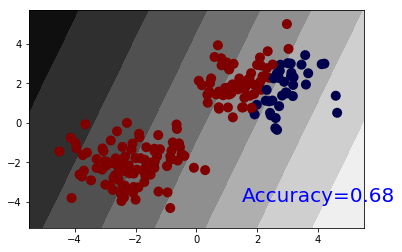

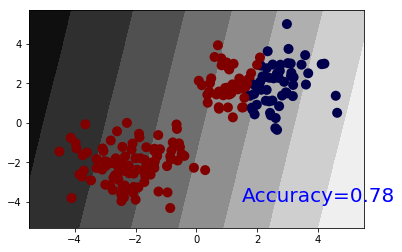

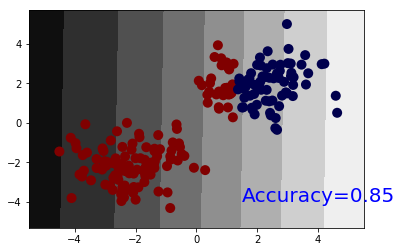

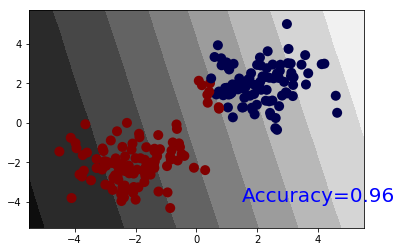

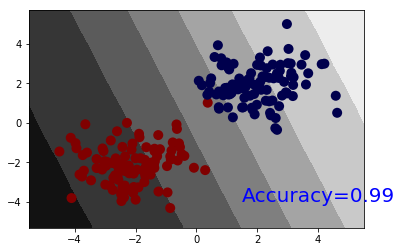

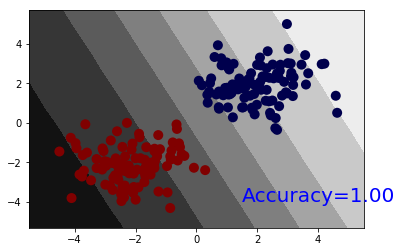

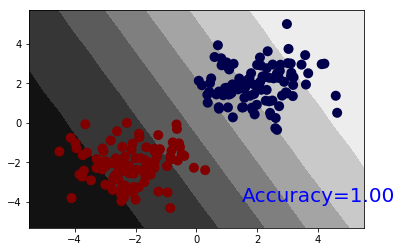

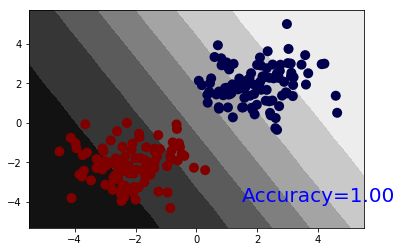

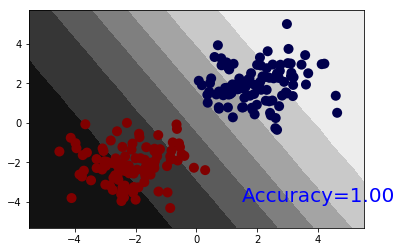

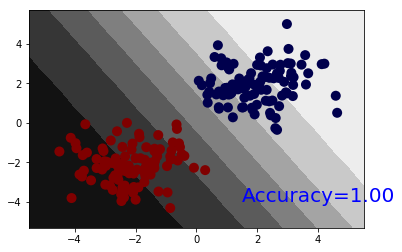

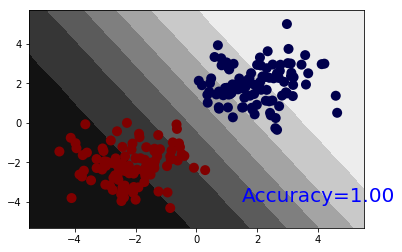

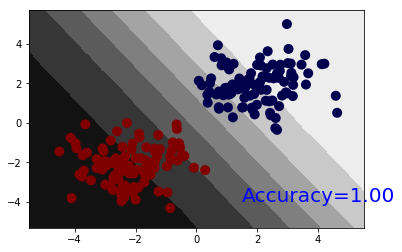

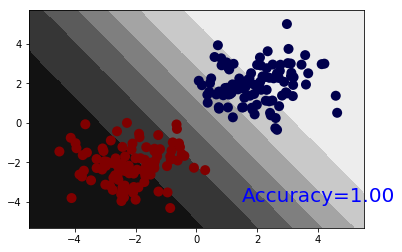

In [20]:
plt.ion()

for t in range(120):
    prob = model(x)
    cost = cost_fn(prob, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if t % 10 == 0 or t in [3,6]:
        plt.cla()
        prediction = prob.gt(0.5)
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.squeeze(1).numpy()
        
        x_min, x_max = x[:, 0].min() -1, x[:,0].max()+1
        y_min, y_max = x[:, 1].min()-1, x[:,1].max()+1
        xx, yy = np.meshgrid(np.arange(x_min.data.numpy(), x_max.data.numpy(), 1),
                            np.arange(y_min.data.numpy(), y_max.data.numpy(), 1))
        
        Z = model(Variable(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()])).float())
        
        Z  = Z.view(xx.shape)
        plt.contourf(xx, yy, Z.data.numpy(), cmap=plt.cm.binary)
        
        plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1], c=pred_y, s=100,lw=0,cmap='seismic')
        #RdYlGn
        accuracy = sum(pred_y == target_y)/200.
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'Blue'})
        plt.show()
        plt.pause(0.1)
        
plt.ioff()

# Softmax REgression

## make data

In [21]:
torch.manual_seed(5)
nb_classes = 3


x_data = [[1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5],
          [1, 7, 5, 5], [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0],
          [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

X = Variable(torch.Tensor(x_data))
Y = Variable(torch.Tensor(y_data))

_, Y_label = Y.max(dim=1)
# 1 - - - 부분중 어디가 제일 큰지 즉 1인 부분을 찾는 방법
print(Y_label)

Variable containing:
 2
 2
 2
 1
 1
 1
 0
 0
[torch.LongTensor of size 8]



## define Model

In [22]:
linear = torch.nn.Linear(4,3,bias=True)

model = torch.nn.Sequential(linear)

In [23]:
model

Sequential (
  (0): Linear (4 -> 3)
)

## define Optimizer and Cost function

In [24]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
cost_fn = nn.CrossEntropyLoss()
#loss(x, class) = weights[class] * (-x[class] + log(\sum_j exp(x[j])))

## Train

In [27]:
for step in range(100001):
    prediction = model(X)
    cost = cost_fn(prediction, Y_label)
    optimizer.zero_grad()
    
    cost.backward()
    optimizer.step()
    
    if step % 200 == 0:
        print(step,cost.data.numpy())

0 [ 1.69105446]
200 [ 0.56547028]
400 [ 0.46749911]
600 [ 0.39140463]
800 [ 0.32017988]
1000 [ 0.24985904]
1200 [ 0.22176734]
1400 [ 0.20203434]
1600 [ 0.18540905]
1800 [ 0.17121942]
2000 [ 0.15897517]
2200 [ 0.14830922]
2400 [ 0.13894074]
2600 [ 0.130651]
2800 [ 0.12326728]
3000 [ 0.11665121]
3200 [ 0.110691]
3400 [ 0.10529544]
3600 [ 0.10038909]
3800 [ 0.09590931]
4000 [ 0.09180347]
4200 [ 0.08802731]
4400 [ 0.08454337]
4600 [ 0.08131925]
4800 [ 0.07832726]
5000 [ 0.07554372]
5200 [ 0.07294761]
5400 [ 0.07052079]
5600 [ 0.0682476]
5800 [ 0.06611396]
6000 [ 0.06410746]
6200 [ 0.06221738]
6400 [ 0.06043379]
6600 [ 0.0587481]
6800 [ 0.05715256]
7000 [ 0.05564011]
7200 [ 0.05420455]
7400 [ 0.05284021]
7600 [ 0.05154194]
7800 [ 0.05030503]
8000 [ 0.04912539]
8200 [ 0.04799917]
8400 [ 0.04692274]
8600 [ 0.04589291]
8800 [ 0.04490693]
9000 [ 0.0439618]
9200 [ 0.04305527]
9400 [ 0.04218484]
9600 [ 0.04134858]
9800 [ 0.04054442]
10000 [ 0.03977067]
10200 [ 0.03902557]
10400 [ 0.0383076]
10600

83200 [ 0.0049153]
83400 [ 0.0049035]
83600 [ 0.00489173]
83800 [ 0.00488]
84000 [ 0.00486831]
84200 [ 0.00485671]
84400 [ 0.00484524]
84600 [ 0.00483384]
84800 [ 0.00482249]
85000 [ 0.00481116]
85200 [ 0.00479988]
85400 [ 0.00478865]
85600 [ 0.00477747]
85800 [ 0.00476635]
86000 [ 0.00475528]
86200 [ 0.0047443]
86400 [ 0.00473336]
86600 [ 0.00472245]
86800 [ 0.00471157]
87000 [ 0.00470075]
87200 [ 0.00468994]
87400 [ 0.00467918]
87600 [ 0.00466845]
87800 [ 0.00465778]
88000 [ 0.00464716]
88200 [ 0.00463661]
88400 [ 0.00462614]
88600 [ 0.00461576]
88800 [ 0.00460542]
89000 [ 0.0045951]
89200 [ 0.00458482]
89400 [ 0.00457458]
89600 [ 0.00456438]
89800 [ 0.00455422]
90000 [ 0.00454409]
90200 [ 0.004534]
90400 [ 0.00452397]
90600 [ 0.00451398]
90800 [ 0.00450403]
91000 [ 0.00449417]
91200 [ 0.00448437]
91400 [ 0.0044746]
91600 [ 0.00446486]
91800 [ 0.00445514]
92000 [ 0.00444545]
92200 [ 0.00443583]
92400 [ 0.00442623]
92600 [ 0.00441666]
92800 [ 0.00440713]
93000 [ 0.00439762]
93200 [ 0.

In [28]:
# Testing & One-hot encoding
print('--------------')
a = model(Variable(torch.Tensor([[1, 11, 7, 9]])))
print(a.data.numpy(), torch.max(a, 1)[1].data.numpy())

print('--------------')
b = model(Variable(torch.Tensor([[1, 3, 4, 3]])))
print(b.data.numpy(), torch.max(b, 1)[1].data.numpy())

print('--------------')
c = model(Variable(torch.Tensor([[1, 1, 0, 1]])))
print(c.data.numpy(), torch.max(c, 1)[1].data.numpy())

print('--------------')
all = model(Variable(torch.Tensor([[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]])))
print(all.data.numpy(), torch.max(all, 1)[1].data.numpy())

--------------
[[ -9.81884766  18.25915909  -7.0667057 ]] [1]
--------------
[[ 10.3867569   -1.48187637  -6.57587242]] [0]
--------------
[[-33.15017319   4.1211977   28.30170441]] [2]
--------------
[[ -9.81884384  18.25915909  -7.0667057 ]
 [ 10.3867569   -1.48187637  -6.57587242]
 [-33.15017319   4.1211977   28.30170441]] [1 0 2]
